In [8]:
import pyspark.sql.functions as fn

In [2]:
df = spark.read.format("csv").option("header", "true").load('/Users/vahid/data/recommender/train_interactions.csv')

In [3]:
type(df)

pyspark.sql.dataframe.DataFrame

In [9]:
gr = df.groupBy(['user_id']).agg(fn.count('notif_id').alias('n_notifs'))

In [11]:
gr.cache()

DataFrame[user_id: string, n_notifs: bigint]

In [13]:
gr.count()

2589286

In [14]:
df_test = spark.read.format("csv").option("header", "true").load('/Users/vahid/data/recommender/test.csv.gz')

In [17]:
notfis_in_test = df_test.select('notif_id').distinct().toPandas()

In [19]:
notifs_in_train = df.select('notif_id').distinct().toPandas()

In [20]:
notfis_in_test.head()

,notif_id
0,552756
1,527202
2,525880
3,527182
4,528385


In [27]:
import numpy as np
np.intersect1d(notfis_in_test.values[0], notifs_in_train.values[0])

array([], dtype=object)

In [31]:
train = set(notfis_in_test.notif_id.values)
test = set(notifs_in_train.notif_id.values)

In [32]:
train.intersection(test)

set()

In [33]:
import pandas as pd

In [56]:
icons_df = pd.read_csv('/Users/vahid/data/recommender/icons.csv')
icons_df.head()

,notif_id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F191,F192,F193,F194,F195,F196,F197,F198,F199,F200
0,447519,-4.966424,11.489478,4.418155,-8.264528,0.483450,-8.726120,-9.982015,-2.117726,-1.253858,...,-0.165652,0.236250,-0.536746,0.074008,-0.198941,-0.087212,0.135536,-0.169727,0.010327,-0.124046
1,441851,1.695928,-9.561707,-1.148592,-7.545650,-8.476706,5.449286,3.271107,3.806645,1.922784,...,-0.284256,-0.293422,-0.112613,-0.665172,-0.145205,-0.445586,-0.055238,0.116369,-0.637553,-0.056821
2,483576,-3.164493,4.960090,-3.474825,-2.931745,1.532727,-2.396772,10.594930,1.161292,0.133073,...,0.108387,-0.069454,0.136111,0.115855,0.003308,0.032245,0.045250,-0.091309,-0.008784,0.300490
3,564340,17.057026,-1.445091,-15.867423,2.147889,-7.040503,1.373868,-4.365830,0.633132,-3.303665,...,-0.168556,0.110151,-0.164698,0.242161,0.055488,0.050694,0.190996,-0.144006,0.439409,0.108422
4,549636,-10.604857,4.211807,-3.017962,-3.874277,-4.608191,-5.410021,-5.191367,1.042329,-4.308573,...,0.413350,-0.187556,-0.132629,0.991428,1.060254,-0.262702,-0.447537,0.092006,0.370397,0.114488


In [67]:
def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

In [46]:
icons_df = icons_df.drop_duplicates()
icons_df.shape

(6279, 201)

In [85]:
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [47]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)
y = pca.fit_transform(icons_df.values)
y.shape

(6279, 2)

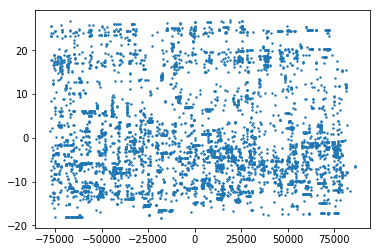

In [73]:
import matplotlib.pyplot as plt
plt.scatter(y[:,0],y[:,1],s=2)

In [97]:
# icons_df.set_index('notif_id', inplace=True)
# print(icons_df.shape)
from sklearn.manifold import TSNE
y = TSNE(n_components=2, n_iter_without_progress=10000).fit_transform(icons_df.values)
y.shape

(6279, 2)

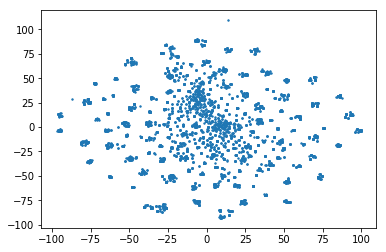

In [95]:
plt.scatter(y[:,0],y[:,1], s=2)

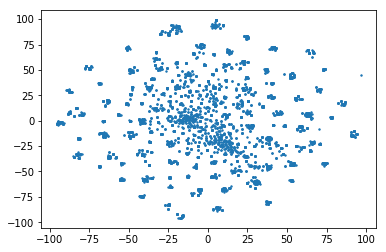

In [98]:
plt.scatter(y[:,0],y[:,1], s=2)

In [86]:
TSNE(n_components=2)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [87]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(y)

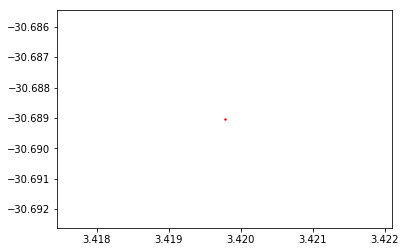

In [84]:
for idx,_y in enumerate(y):
    plt.scatter(_y[0], _y[1], s=2, color='red')

In [90]:
icons_df.values.shape

(6279, 201)

In [ ]:
df_tra